# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
# Your code here. 
student_data = pd.DataFrame({'X':[17, 51, 27, 21, 36, 48, 19, 26, 54, 30],
                             'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

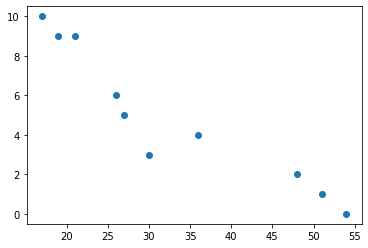

In [20]:
# Your code here.
plt.scatter(student_data.X,student_data.Y )

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [22]:
# Yes, the two variables are negatively correlated

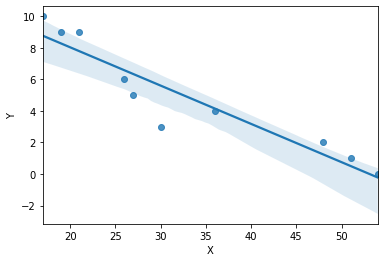

In [21]:
# Your response here. 
sns.regplot(student_data.X,student_data.Y )

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [53]:
# X - mean(X) * Y - mean(Y)
np.cov(student_data.X, student_data.Y)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

In [73]:
student_data.corr()

,X,Y
X,1.000000,-0.939163
Y,-0.939163,1.000000


In [26]:
student_data.X.corr(student_data.Y)

-0.9391626886887122

In [27]:
# Your response here.
# A correlation closer to 1 means a strong positive linear relationship between the two variables. 
# Here the correlation is over -93%. This indicates a strong negative linear relationship between X and Y.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [34]:
# Your response here.
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
X

0    17
1    51
2    27
3    21
4    36
5    48
6    19
7    26
8    54
9    30
Name: X, dtype: int64

In [37]:
y

0    10
1     1
2     5
3     9
4     4
5     2
6     9
7     6
8     0
9     3
Name: Y, dtype: int64

In [39]:
X = student_data[['X']]
y = student_data['Y']
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = model.predict(X)
y_pred

array([ 8.76085026,  0.50494405,  6.33264255,  7.78956717,  4.14725561,
        1.23340636,  8.27520872,  6.57546332, -0.22351827,  5.60418024])

Plot your regression model on your scatter plot.

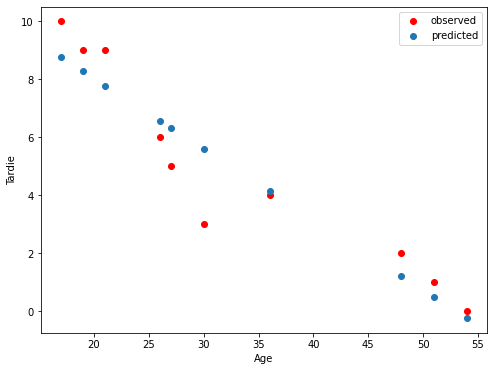

In [58]:
# Your code here.

plt.figure(figsize=(8,6))
plt.xlabel('Age')
plt.ylabel('Tardie')
plt.scatter(X, y, color='red', label='observed')

# plot the predicted values together with the observed values
plt.scatter(X, y_pred, label='predicted')


plt.legend()

Interpret the results of your model. What conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [59]:
model.coef_

array([-0.24282077])

In [60]:
model.intercept_

12.888803363135771

In [61]:
# Your response here. 
## -> It seems like there is a certain correlation

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [62]:
# Import any libraries you may need & the data
vehicle = pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

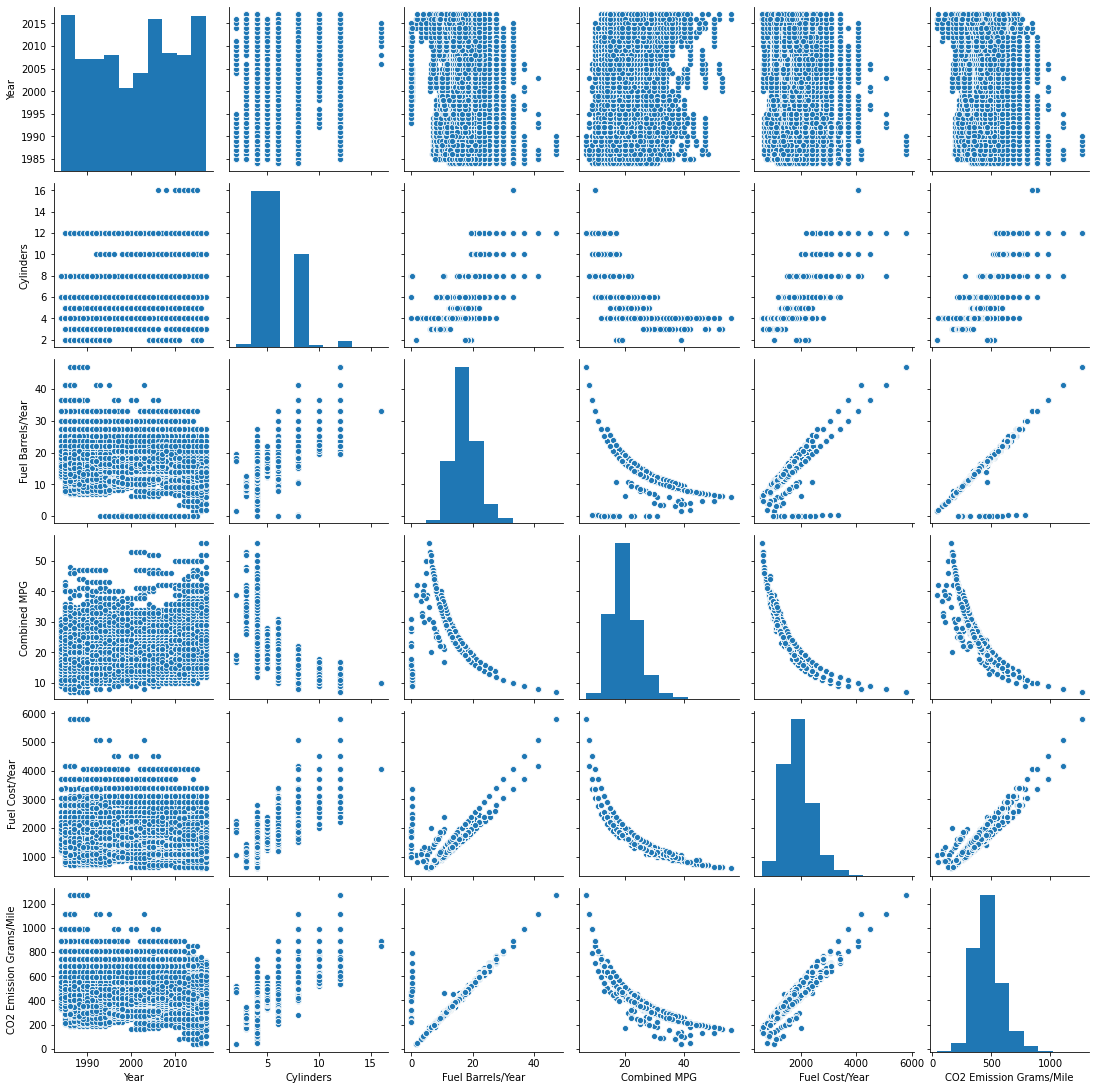

In [68]:
# ploting in graphs to verify correlation

sns.pairplot(vehicle.loc[:,['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']])

In [65]:
vehicle.loc[:,['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [ ]:
# Your response here. 
# Least amount of helpful information: 'Year' (far from 1)
# Most important info:'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year' (near 1)

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [79]:
X = vehicle[['Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicle['CO2 Emission Grams/Mile']

model.fit(X,y)

model.coef_

array([ 1.04483633, 19.62713308, -3.16658852,  0.029393  ])

In [80]:
model.intercept_

131.1563247541892

In [81]:
model.score(X,y)

0.9802919387898396

In [109]:
X = vehicle[['Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = vehicle['CO2 Emission Grams/Mile']

model.fit(X,y)

model.score(X,y)

0.9801993833262163

In [110]:
model.coef_

array([19.69545749, -3.166074  ,  0.03166095])

In [111]:
model.intercept_

131.67417184227276

In [99]:
# Since all the variables are in different scales, it's necessary to standardize them:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [100]:
np.mean(X_std)

6.798695513503407e-17

In [101]:
model = LinearRegression()

model.fit(X_std, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
model.coef_

array([ 87.98395259, -16.18603991,  16.05057053])

In [103]:
model.intercept_

475.3163392572124

In [104]:
model.score(X,y)

-75510.5804484688

In [107]:
# Your response here. 
# It's a multiple linear regression

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [114]:
import statsmodels.api as sm

In [115]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
predictions = results.predict(X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.980
Model:                                 OLS   Adj. R-squared:                  0.980
Method:                      Least Squares   F-statistic:                 5.932e+05
Date:                     Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                             17:29:47   Log-Likelihood:            -1.5235e+05
No. Observations:                    35952   AIC:                         3.047e+05
Df Residuals:                        35948   BIC:                         3.047e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               131.6742      1.691     77.861      0.000     128.359     134.989
Fuel Barrels/Year    19.6955      0.059    331.484      0.000      19.579      19.812
Combined MPG         -3.1661      0.043    -73.626      0.000      -3.250      -3.082
Fuel Cost/Year        0.0317      0.000     70.466      0.000       0.031       0.033
==============================================================================
Omnibus:                    72593.271   Durbin-Watson:                   0.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        277905639.131
Skew:                          16.687   Prob(JB):                         0.00
Kurtosis:                     432.423   Cond. No.                     3.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Your response here. 


## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [117]:
# Your code here. 
df = pd.DataFrame({'X': [1, 3, 4, 6, 8, 9, 11, 14],
                   'Y':[1, 2, 4, 4, 5, 7, 8, 13]})


In [118]:
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [131]:
model = LinearRegression()

In [135]:
model.fit(df[['X']], df.Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [139]:
y_pred = model.predict(df[['X']])
y_pred

array([ 0.40909091,  2.10606061,  2.95454545,  4.65151515,  6.34848485,
        7.1969697 ,  8.89393939, 11.43939394])

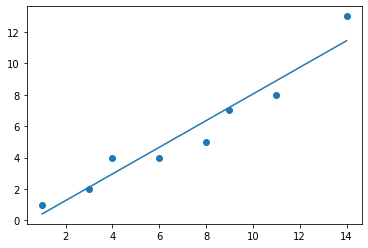

In [140]:
plt.scatter(df.X, df.Y)
plt.plot(df.X, y_pred)

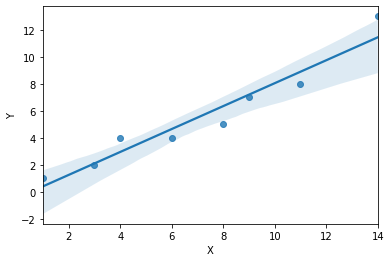

In [129]:
# Your code here.
sns.regplot(df.X, df.Y);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [141]:
model.coef_

array([0.84848485])

In [142]:
model.intercept_

-0.43939393939393945

In [143]:
# Your response here. 
# This plot tells that every 1 person that is invited, 0.85 person doesn't come the party

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [185]:
# identifiying outliers (between 3 standard deviations from the mean)
df.std()

X    4.342481
Y    3.817254
dtype: float64

In [178]:
df.mean()

X    7.0
Y    5.5
dtype: float64

In [183]:
df.mean() + 3* df.std()

X    20.027444
Y    16.951762
dtype: float64

In [184]:
df.mean() - 3* df.std()

X   -6.027444
Y   -5.951762
dtype: float64

In [155]:
outlier.X

13.027443560203427

In [158]:
df.shape

(8, 2)

In [163]:
new_x = []
new_y = []

for i in range(df.shape[0]):
    if df.loc[i, 'X'] < outlier.X and df.loc[i, 'X'] > -outlier.X:
        new_x.append (df.loc[i, 'X'])
        new_y.append (df.loc[i, 'Y'])

In [164]:
new_df = pd.DataFrame({'X': new_x,
                      'Y': new_y})

In [165]:
new_df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


In [172]:
new_model = LinearRegression()
new_model.fit(new_df[['X']], new_df.Y)
new_y_pred = new_model.predict(new_df[['X']])

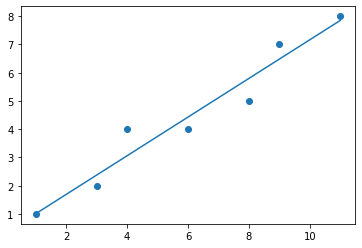

In [173]:
plt.scatter(new_df.X, new_df.Y)
plt.plot(new_df.X, new_y_pred)

In [174]:
new_model.coef_

array([0.68421053])

In [175]:
new_model.intercept_

0.32330827067669254

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [176]:
# Your response here. 
# the coeficient droped down from 0.8 to 0.6, without the outlier, 
# showing that myabe the 1 variables aren't that correlated